In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("CompleteDataSet.csv",low_memory=False,skiprows=[1])

In [3]:
data=df[['BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20','Activity']]



In [4]:
data["BeltAccelerometer"]=data["BeltAccelerometer"].astype("float")
data["Unnamed: 16"]=data["Unnamed: 16"].astype("float")
data["Unnamed: 17"]=data["Unnamed: 17"].astype("float")
data["BeltAngularVelocity"]=data["BeltAngularVelocity"].astype("float")
data["Unnamed: 19"]=data["Unnamed: 19"].astype("float")
data["Unnamed: 20"]=data["Unnamed: 20"].astype("float")
data["Activity"]=data["Activity"].astype("float")


C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [5]:
Walking=data[data["Activity"]==6].head(8872)
Standing=data[data["Activity"]==7].head(8872)
Sitting=data[data["Activity"]==8].head(8872)
Laying=data[data["Activity"]==11].head(8872)
Jumping=data[data["Activity"]==10].head(8872)
Falling_sideways=data[data["Activity"]==4].head(8872)
Falling_backwards=data[data["Activity"]==3].head(8872)
Falling_forward_using_hands=data[data["Activity"]==1].head(8872)
Falling_forward_using_knees=data[data["Activity"]==2].head(8872)
Falling_sitting_in_empty_chair=data[data["Activity"]==5].head(8872)
Picking_up_an_object=data[data["Activity"]==9].head(8872)


In [15]:
nfal=pd.DataFrame()
nfal=nfal.append([Walking,Standing,Sitting,Laying,Jumping,Picking_up_an_object])
nfal["Fall"]=0

In [16]:
nfal.head()

,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20,Activity,Fall
2832,0.125,0.909,0.526,34.451,-8.354,-33.232,6.0,0
2833,0.280,1.057,0.640,-31.463,-24.024,-0.549,6.0,0
2834,0.280,1.057,0.640,1.220,-26.524,27.927,6.0,0
2835,0.335,1.095,0.394,34.634,-10.427,16.280,6.0,0
2836,0.335,1.095,0.394,-58.171,5.000,-2.744,6.0,0


In [17]:
fal=pd.DataFrame()
fal=fal.append([Falling_sideways,Falling_backwards,Falling_forward_using_hands,Falling_forward_using_knees,Falling_sitting_in_empty_chair])
fal["Fall"]=1
fal.head()

,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20,Activity,Fall
1701,0.050,0.900,0.385,2.927,2.805,9.634,4.0,1
1702,0.049,0.911,0.398,2.927,1.159,11.037,4.0,1
1703,0.049,0.911,0.398,-1.402,1.707,8.780,4.0,1
1704,0.069,0.909,0.381,1.646,-0.183,2.134,4.0,1
1705,0.078,0.898,0.395,-2.744,0.000,-0.427,4.0,1


In [18]:
bal_data=pd.DataFrame()
bal_data=bal_data.append([fal,nfal])
print(bal_data["Fall"].value_counts())
np.shape(bal_data)

0    53232
1    44360
Name: Fall, dtype: int64


(97592, 8)

In [20]:
bal_data.head()

,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20,Activity,Fall
1701,0.050,0.900,0.385,2.927,2.805,9.634,4.0,1
1702,0.049,0.911,0.398,2.927,1.159,11.037,4.0,1
1703,0.049,0.911,0.398,-1.402,1.707,8.780,4.0,1
1704,0.069,0.909,0.381,1.646,-0.183,2.134,4.0,1
1705,0.078,0.898,0.395,-2.744,0.000,-0.427,4.0,1


In [22]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
bal_data['label'] = label.fit_transform(bal_data['Fall'])
bal_data.head()

,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20,Activity,Fall,label
1701,0.050,0.900,0.385,2.927,2.805,9.634,4.0,1,1
1702,0.049,0.911,0.398,2.927,1.159,11.037,4.0,1,1
1703,0.049,0.911,0.398,-1.402,1.707,8.780,4.0,1,1
1704,0.069,0.909,0.381,1.646,-0.183,2.134,4.0,1,1
1705,0.078,0.898,0.395,-2.744,0.000,-0.427,4.0,1,1


In [23]:
X = bal_data[['BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20']]
y = bal_data['label']

In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(data = X, columns = ['BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20'])


X

,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20
0,0.124161,1.371368,0.357820,0.015018,0.029058,0.109857
1,0.122052,1.385978,0.377202,0.015018,0.013042,0.128453
2,0.122052,1.385978,0.377202,-0.035659,0.018374,0.098538
3,0.164221,1.383322,0.351856,0.000022,-0.000016,0.010450
4,0.183196,1.368712,0.372729,-0.051369,0.001765,-0.023494
...,...,...,...,...,...,...
97587,-1.754439,0.733846,-0.763366,0.020731,-0.005358,0.000748
97588,-1.748113,0.739158,-0.761875,0.014304,-0.002984,-0.001664
97589,-1.748113,0.739158,-0.761875,-0.009963,-0.010106,-0.016217
97590,-1.748113,0.731189,-0.769330,0.001450,-0.002984,-0.008132


In [25]:
from sklearn import svm
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [28]:
label.classes_

array([0, 1], dtype=int64)

In [29]:
linear = svm.SVC(kernel='linear', verbose=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

[LibSVM]

In [30]:
linear_pred = linear.predict(X_test)

In [31]:
accuracy_lin = linear.score(X_test, y_test)

In [32]:
print(accuracy_lin)

0.6558166541430426


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,linear_pred)

array([[13761,  2209],
       [ 7868,  5440]], dtype=int64)

In [34]:
rbf = svm.SVC(kernel='rbf', gamma=1, verbose=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

[LibSVM]

In [35]:
poly = svm.SVC(kernel='poly', gamma='auto', degree=3, verbose=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

[LibSVM]

In [36]:
sig = svm.SVC(kernel='sigmoid', gamma='auto', verbose=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

[LibSVM]

In [37]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [38]:
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)


In [39]:
print(accuracy_lin)
print(accuracy_poly)
print(accuracy_rbf)
print(accuracy_sig)

0.6558166541430426
0.6713573331511715
0.8737618689801216
0.44579547783318535


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rbf_pred)

array([[15204,   766],
       [ 2930, 10378]], dtype=int64)

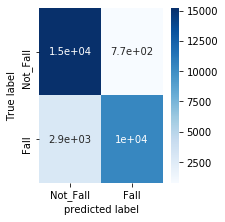

In [43]:
import seaborn as sns
cm = confusion_matrix(y_test, rbf_pred)
#axis_labels = ['Falling_Forward_Using_Hands','Falling_Forward_Using_Knees','Falling_Backwards','Falling_Sideways','Falling_Sitting_in_Empty_Chair','Walking','Standing','Sitting','Picking_Up_an_Object','Jumping','Laying']
axis_labels=['Not_Fall','Fall']
figure = plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=axis_labels, yticklabels=axis_labels)
plt.ylim(len(cm),0,0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('predicted label')
plt.show()
